In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
iris = pd.read_csv('iris_missing.csv')
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  148 non-null    float64
 1   Sepal_Width   147 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#summary statistic
iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,148.000000,147.000000,150.000000,150.000000
mean,5.845270,3.055102,3.758667,1.198667
std,0.833429,0.437957,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#mencari persentase data yang missing
nulls = iris.isnull().sum()
nulls_percentage = nulls[nulls!=0]/iris.shape[0]*100
print(round(nulls_percentage,2))

Sepal_Length    1.33
Sepal_Width     2.00
dtype: float64


In [6]:
iris[iris.isna().any(axis=1)]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
66,NaN,NaN,4.5,1.5,Iris-versicolor
82,NaN,2.7,3.9,1.2,Iris-versicolor
127,6.1,NaN,4.9,1.8,Iris-virginica
135,7.7,NaN,6.1,2.3,Iris-virginica


In [7]:
df_drop = iris.dropna()
df_drop.shape

(146, 5)

In [8]:
df_konstan = iris.fillna(0) #fill NaN with zero
df_konstan.shape

(150, 5)

In [9]:
df_mean = iris.fillna(iris.mean()) # fill NaN with mean
df_mean.shape

C:\Users\User\AppData\Local\Temp\ipykernel_22372\3217507165.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean = iris.fillna(iris.mean()) # fill NaN with mean


(150, 5)

<AxesSubplot:>

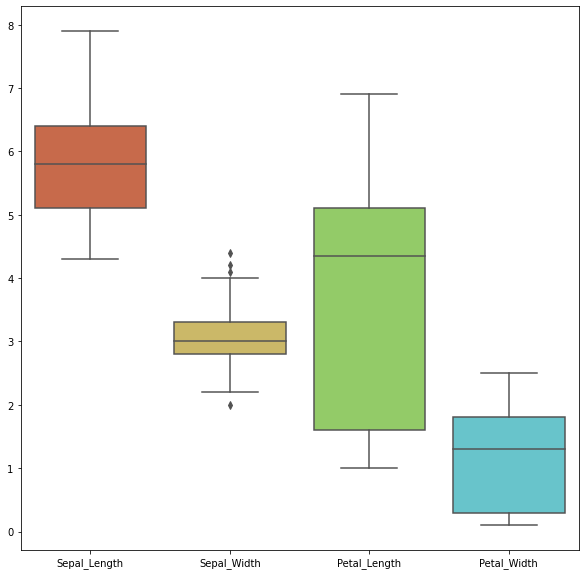

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=iris, palette=('#db5f37', '#dbc257','#91db57','#57d3db'))

In [11]:
#select data with outlier, will be resolved using iscare
data_sepal = iris[['Sepal_Width']]
data_sepal

,Sepal_Width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


In [12]:
stats.zscore(data_sepal, nan_policy='omit')

,Sepal_Width
0,1.019322
1,-0.126246
2,0.331981
3,0.102867
4,1.248436
...,...
145,-0.126246
146,-1.271815
147,-0.126246
148,0.790209


In [13]:
#get data inside 3 nigma
data_zscore = data_sepal[(np.abs(stats.zscore(data_sepal, nan_policy='omit')) < 3).all(axis = 1)]
data_zscore.shape

(146, 1)

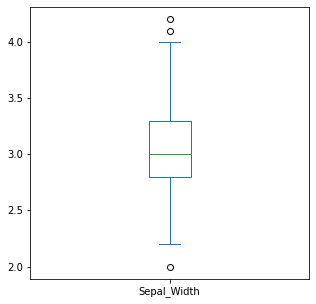

In [14]:
data_zscore.plot(kind='box',figsize=(5,5))
plt.show()

In [15]:
# Handling Outlier with IQR

#Q1, Q3, dan interquartile range
Q1 = data_sepal.quantile(q=.25)
Q3 = data_sepal.quantile(q=.75)
IQR = Q3-Q1 #IQR=Q3-Q1 or use stats.iqr from scipy

#take value 1.5*IQR from Qi and Q3
data_iqr = data_sepal[~((data_sepal < (Q1-1.5*IQR)) | (data_sepal > (Q3+1.5*IQR))).any(axis=1)]
data_iqr.shape

(146, 1)

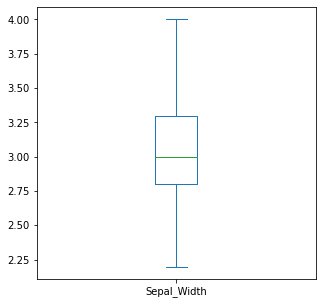

In [16]:
data_iqr.plot(kind='box',figsize=(5,5))
plt.show()

In [17]:
data_zscore.columns = ['Z-Score']
data_iqr.columns = ['IQR']

In [18]:
result = pd.concat([data_sepal,data_zscore,data_iqr],axis=1)

<AxesSubplot:>

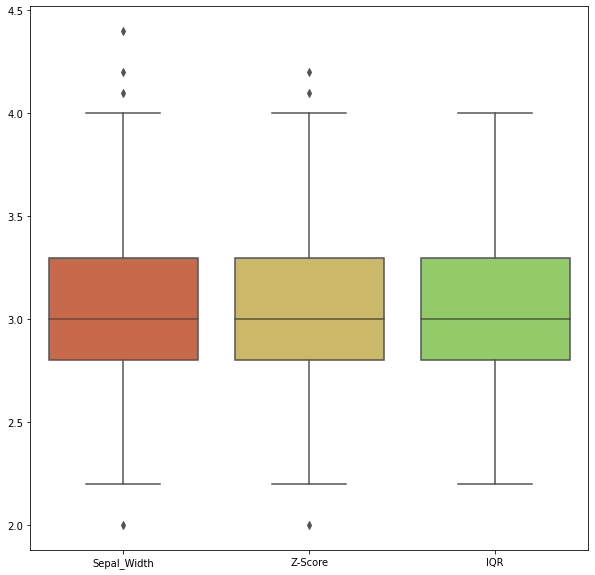

In [21]:
fig, ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=result, palette=('#db5f37', '#dbc257','#91db57'))

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split

In [25]:
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
x= iris[['Sepal_Width','Sepal_Length','Petal_Width','Petal_Length']]
y= iris[['Species']]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [28]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(105, 4) (45, 4)
(105, 1) (45, 1)
